<a href="https://colab.research.google.com/github/abbazs333/ML_dev_training/blob/main/end_to_end_dog_breed_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#End to end multiclass dog breed detection

this notebook builds a multiclass classification model using tensorflow and tensorflow 2.0

##1. Problem

identifying the breed of a dog using a provided image

##2. Data

the data we are using is from a kaggle competition (https://www.kaggle.com/competitions/dog-breed-identification)

##3. Evaluation

the evaluation (or the submission file in this case) is a file containing the probaboilty of being any of the listed dog breeds for every given image

##4. Features

some info about the data:

* were dealing with dog images (ustructured data) so we'll be using deep learning
* there are 120 dog breeds so the model is a multiclass clasifier 
* there are around 10,000 + images in each train and test folder


In [1]:
# unzip the zip folder containg the needed data
# !unzip "/content/drive/MyDrive/Colab Notebooks/dog breed detection project/dog-breed-identification.zip" -d "/content/drive/MyDrive/Colab Notebooks/dog breed detection project/"

##Importing neccasary tools

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image

##Importing and getting the data ready

In [3]:
#Importing the labels.csv file
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dog breed detection project/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


How many images are there per each breed?

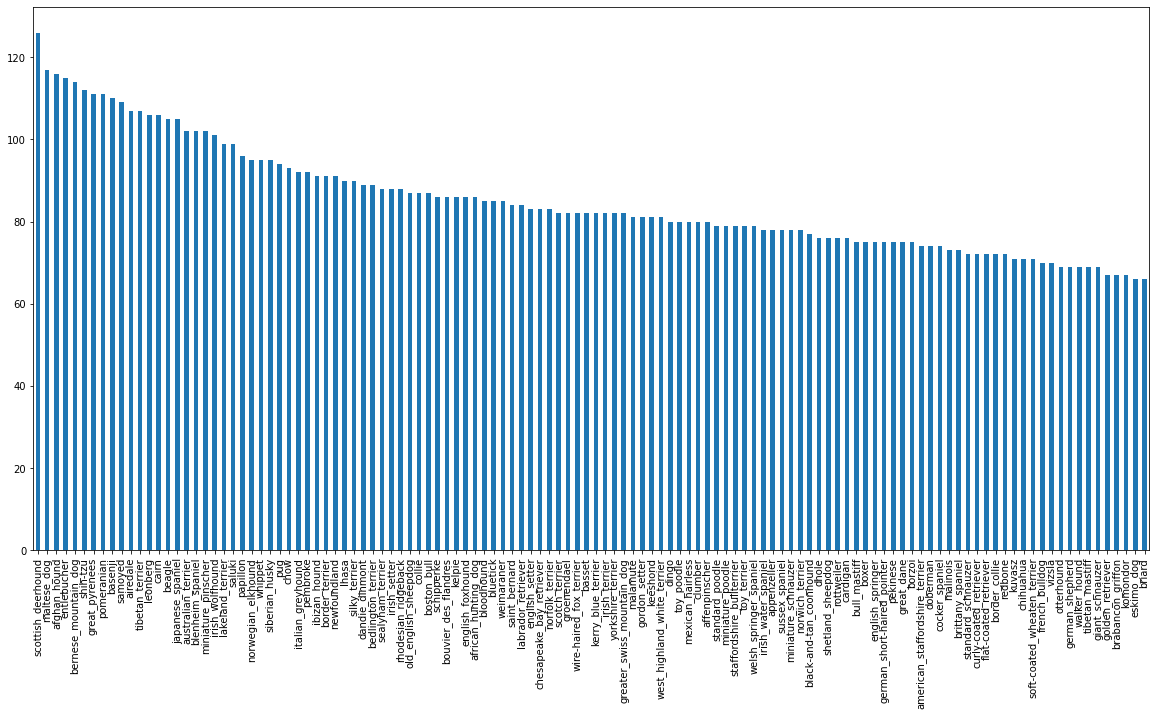

In [4]:
labels["breed"].value_counts().plot.bar(figsize=(20,10))

Okay sweet. If we were to roughly draw a line across the middle of the graph, we'd see there's about 60+ images for each dog breed.

This is a good amount as for some of their vision products Google recommends a minimum of 10 images per class to get started. And as you might imagine, the more images per class available, the more chance a model has to figure out patterns between them.

Ok so we now have a dataframe that consists of the filename of the image along with what class it is

We need to form some other data forms as well:
* an ordered array consisting of the labels
* an unique array of the dog breeds
* an ordered array of the file paths of all images

In [5]:
#Lets create a file path array 

filenames = []
for val in labels["id"]:
  filenames.append("/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/" + val + ".jpg")
filenames[:10]


['/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/003df8b8a8b05

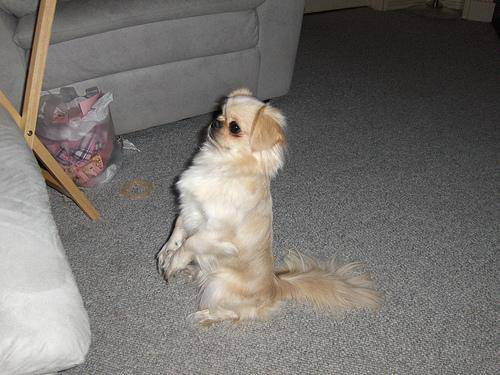

In [6]:
Image(filenames[2])

Lets go! the filename array is done

now we'll also check if the number of files in the directory is equal to the number of files we have in our dataframe and python list

In [7]:
import os

if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/")) == len(filenames):
  print("they are equal!")
else:
  print("they are not equal!!!!!")

they are equal!


Great! the number of images match. Since ML models cant take strings as parameters, we'll have to convert the labels dataframe into a another form

In [8]:
unique_labels = np.unique(labels["breed"])


Now we can use the uniqe values to convert the labels to boolean arrays.

In [9]:
#lets try converting one label to a numpy array

labels["breed"][3] == unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
#Now lets make an array that consist of all te boolean values for every label!

boolean_labels = []
for val in labels["breed"]:
  boolean_labels.append(val == unique_labels)

boolean_labels = np.array(boolean_labels)
boolean_labels[:10]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Great! now we have an array that represents the boolean values for each label

though we still have something to do, the boolean array has to be converted into number (in this case 1s and 0s)

In [11]:
num_labels = boolean_labels.astype(int)
num_labels[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Since we don't have a validation test, lets make one!

In [20]:
x = filenames
y = boolean_labels

np.random.seed(333)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x[:1000],y[:1000], test_size=0.2)
#For the moment let's only work on the first 1000 samples
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [21]:
x_train[:5],y_train[:5]

(['/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/1177d2702335c889d4c1456e45e3d2ef.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/131ccf48aba2dc53174c170b2429e55b.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/00693b8bc2470375cc744a6391d397ec.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/0c378307f600ba007a7eaa50fba6d0b8.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog breed detection project/train/0998eda08cdb14648e444c15f06658af.jpg'],
 array([[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,